In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [5]:
# Load all results
with open('C:/week4-nlp-llms/outputs/results/method_comparison.json', 'r') as f:
    comparison = json.load(f)

df = pd.DataFrame(comparison)

In [6]:
# Display comparison
print("="*80)
print("FINAL RESULTS COMPARISON")
print("="*80)
print(df[['method', 'accuracy', 'f1']])

FINAL RESULTS COMPARISON
                         method  accuracy        f1
0  Baseline (TF-IDF + Logistic)   0.88116  0.881159
1          Prompting (one_shot)   0.90000       NaN
2               LoRA Fine-tuned   0.91344  0.913422


In [8]:
# Best method
best_idx = df['accuracy'].idxmax()
print(f"\nWinner: {df.loc[best_idx, 'method']}")
print(f"   Accuracy: {df.loc[best_idx, 'accuracy']:.4f}")


Winner: LoRA Fine-tuned
   Accuracy: 0.9134


In [9]:
# Improvement over baseline
baseline_acc = df[df['method'].str.contains('Baseline')]['accuracy'].values[0]
lora_acc = df[df['method'].str.contains('LoRA')]['accuracy'].values[0]
improvement = ((lora_acc - baseline_acc) / baseline_acc) * 100

print(f"\n📈 LoRA improvement over baseline: {improvement:.2f}%")


📈 LoRA improvement over baseline: 3.66%


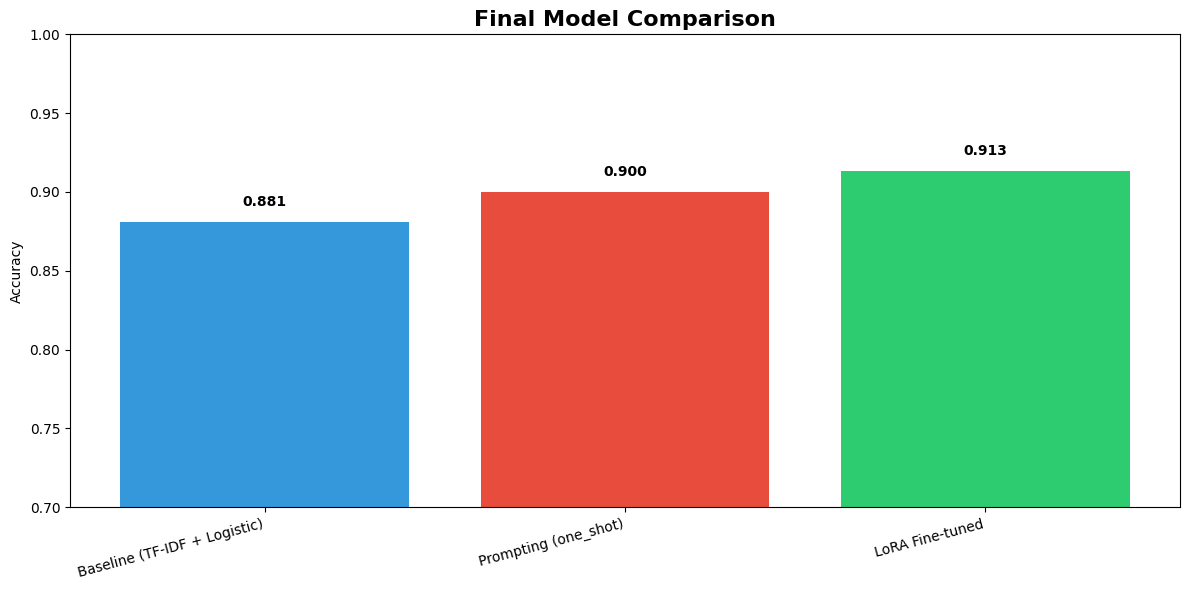


✅ Analysis complete!


In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(df))
ax.bar(x, df['accuracy'], color=['#3498db', '#e74c3c', '#2ecc71'])
ax.set_xticks(x)
ax.set_xticklabels(df['method'], rotation=15, ha='right')
ax.set_ylabel('Accuracy')
ax.set_title('Final Model Comparison', fontsize=16, fontweight='bold')
ax.set_ylim([0.7, 1.0])

for i, v in enumerate(df['accuracy']):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('C:/week4-nlp-llms/outputs/figures/final_comparison.png', dpi=300)
plt.show()

print("\n✅ Analysis complete!")